# Hands-on Lesson 2 - Classification: Logistic regression, k-means

In this hands-on lesson, we will: implement three different algorithms for classification.  
- Implement Logistic regression from scratch and apply it to a very simple dataset.
- Using sklearn and logistic regression to classify MNIST digits
- Implement K-means from scratch and apply it to a very simple dataset.


### To start, let us import the required libraries 

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import random


# 1. Logistic Regression

## 1.1 Reminder about Logistic Regression
Logistic regression is a supervised learning algorithm for classification and it works as follows:
 
- the given dataset is: $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(N)}, y^{(N)})\}$  (it contains $N$ samples) 
- each $\boldsymbol{x}^{(i)}$ is a $m-$dimensional vector $\boldsymbol{x}^{(i)} = (x^{(i)}_1, ..., x^{(i)}_m)$
- the outcomes $y^{(i)}$ are binary target variables, $y^{(i)} \in \{0,1\}$

The logistic regression model can be interpreted as a very **simple neural network:**

![title](Figures/LogisticRegression.png)

- it has  only one input layer connected with the output via a real-valued weight vector $\boldsymbol{w}= (w^{(0)}, w^{(1)}, ..., w^{(m)})$. 
- it uses a **sigmoid activation function**
- weights can be trained using  **gradient descent**








### Equations for Logistic Regression 

To implement Logistic regression we need to perform the following steps, which we break into parts:

0. Initialize the weight vector and bias with zeros (or small random values).

1. Compute a linear combination of the input features and weights. Denoting with $\boldsymbol{X}$ the matrix of shape $(N,m)$ that holds all training examples (N= number of samples, m = number of features),
this can be done in one step for all training examples, using vectorization and broadcasting:

$$\boldsymbol{z} = \boldsymbol{X} \boldsymbol{w} + b $$

2. Apply the sigmoid activation function, which returns values between 0 and 1:

$$\boldsymbol{\hat{y}} = \sigma(\boldsymbol{z}) = \frac{1}{1 + \exp(-\boldsymbol{z})}$$

3. Compute the cost over the whole training set. 

$$J(\boldsymbol{w}) = - \frac{1}{N} \sum_{i=1}^N \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]$$

4. Compute the gradient of the cost function with respect to the weight vector:

$$ \frac{\partial J}{\partial w_j} = \frac{1}{N}\sum_{i=1}^N\left[\hat{y}^{(i)}-y^{(i)}\right]\,x_j^{(i)} $$

5. Update the weights ($\alpha$ is the learning rate):

$$\boldsymbol{w} = \boldsymbol{w} - \alpha \, \nabla_w J$$  



## 1.2 Implement Logistic Regression from scratch

### Generate fake data
Note that they are linearly sepearable.  

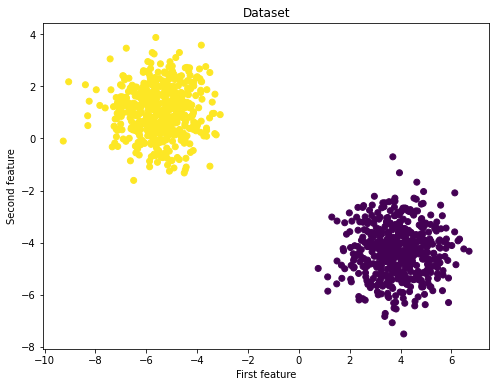

In [2]:
# We will perform logistic regression using a simple toy dataset of two classes
np.random.seed(123) # fix the seed for reproducibility

X, y_true = make_blobs(n_samples= 1000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

### EXERCISE: Reshape the target and split the data

In [3]:
# Reshape targets to get column vector with shape (N, 1), where N is the number of samples
y_true = y_true[:, np.newaxis]

"""
# Split the data into a training and test set
uncomment the line before and use the sklearn function 'train_test_split' to split the data
"""
X_train, X_test, y_train, y_test = train_test_split(X, y_true) #<- EDIT THIS

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


### EXERCISE: write a class that implements Logistic Regression

In [10]:
class LogisticRegressionScratch:
    
    def __init__(self):
        pass

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def train(self, X, y_true, n_iters, learning_rate):
        """
        Trains the logistic regression model on given data X and targets y
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        costs = []
        
        for i in range(n_iters):
            # Step 1 and 2: Compute a linear combination of the input features and weights, 
            # apply the sigmoid activation function
            z = np.dot(X, self.weights)
            y_predict = self.sigmoid(z)
            # Step 3: Compute the cost over the whole training set.
            cost = (- 1 / n_samples) * (
                np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict))))

            # Step 4: Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))

            # Step 5: Update the parameters
            self.weights = self.weights - learning_rate * dw

            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

        #return self.weights, self.bias, costs
        return self.weights,  costs

    def predict(self, X):
        """
        Predicts binary labels for a set of examples X.
        """
        y_predict = self.sigmoid(np.dot(X, self.weights))
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]
        return np.array(y_predict_labels)[:, np.newaxis]

### Plot the evolution of cost during training 

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.046514002935609956
Cost after iteration 200: 0.024053377439991634
Cost after iteration 300: 0.016354408151412213
Cost after iteration 400: 0.012445770521974637
Cost after iteration 500: 0.010073981792906514


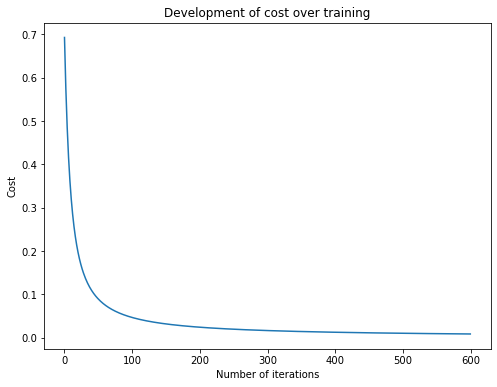

In [11]:
X_train_bias = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1) # add a columns of ones to X

regressor = LogisticRegressionScratch()
w_trained, costs = regressor.train(X_train_bias, y_train, n_iters=600, learning_rate=0.009)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

### EXERCISE : plot the decision boundary
In the code above we implemented logistic regression using X[:,0], X[:,1] as features.
- Which type of decision boundary do you expect to get?
- Plot it in the feature1/feature2 plane

In [7]:
#Define x_db and y_db appropriately in order to ge the boudaries

x_db = np.arange(min(X[:,0]+3),max(X[:,0]-3),0.1) # <- EDIT THIS
y_db = - w_trained[0]/w_trained[2] - w_trained[1]/w_trained[2]*x_db # <- EDIT THIS

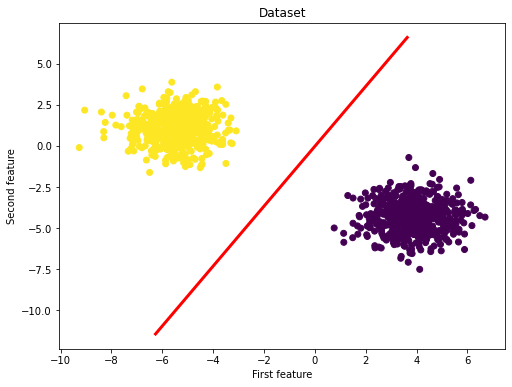

In [8]:
y_true=np.squeeze(y_true) # this is to use y_true in the scatter plot

# Make the figure
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.plot(x_db,y_db,color='Red',linewidth=3) 
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()